In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### EDA 1
Title: Bike Details Dataset

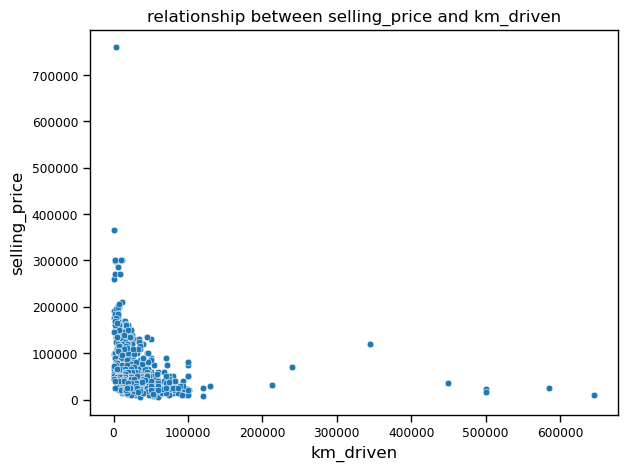

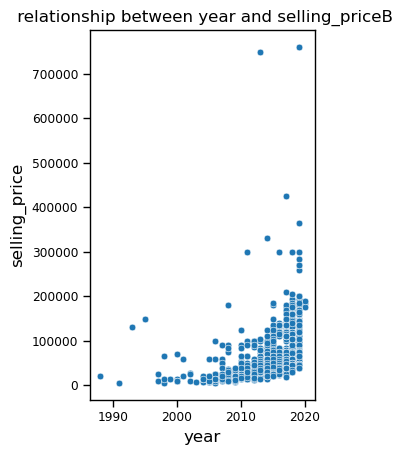

<Axes: >

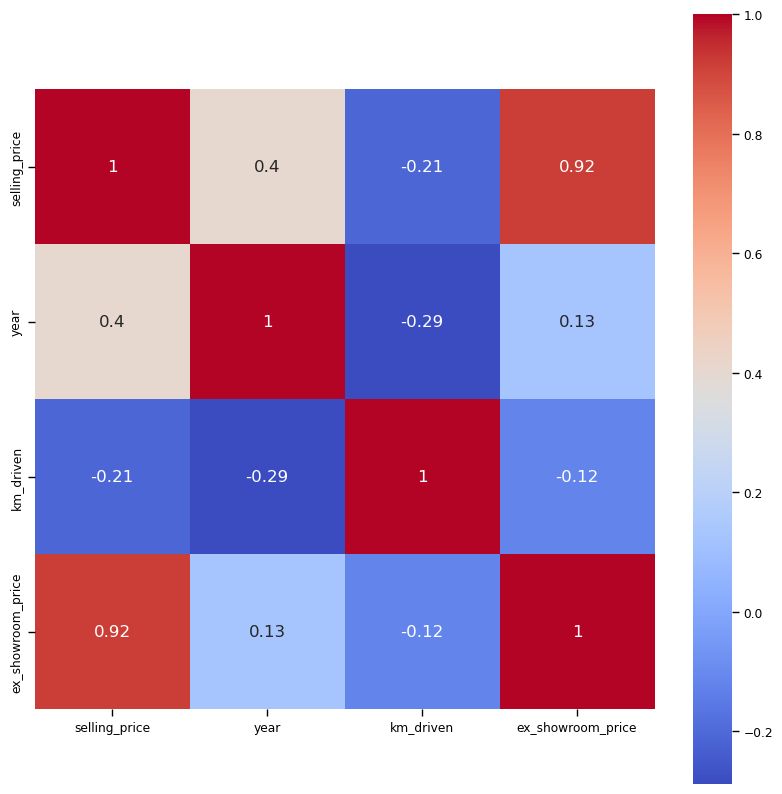

In [135]:
df  = pd.read_csv("BIKE_DETAILS.csv")

# 1 What is the range of selling prices in the dataset ans = 755000

range_of_selling = df['selling_price'].max() - df['selling_price'].min()

# 2 What is the median selling price for bikes in the dataset ans = 45000.0

median_selling_price = df['selling_price'].median()

# 3 What is the most common seller type ans = Individual    1055

most_common_seller_type = df['seller_type'].value_counts()

# 4 How many bikes have driven more than 50,000 kilometers

bikes_driven_more_than_50k = df[df['km_driven'] > 50000]['seller_type'].value_counts()

# 5  What is the average km_driven value for each ownership type

average_km_driven_by_owner = df.groupby('owner')['km_driven'].mean()

# 6 What proportion of bikes are from the year 2015 or older

bikes_from_2015_or_older = df[df['year'] >= 2015]['seller_type'].value_counts()

# 7 What is the trend of missing values across the dataset

missing_values_per_column = df.isnull().sum() / len(df) * 100

# 8 What is the highest ex_showroom_price recorded, and for which bike

highest_ex_showroom_price = df['ex_showroom_price'].max()

highest_ex_showroom_price_bike = df[df['ex_showroom_price'] == highest_ex_showroom_price]['name']

# 9 What is the total number of bikes listed by each seller type

total_bikes_by_seller_type = df['seller_type'].value_counts()

# 10 What is the relationship between selling_price and km_driven for first-owner bikes

plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
first_owner_bikes = df[df['owner'] == '1st owner']

sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title("relationship between selling_price and km_driven")
plt.show()
# 11 Identify and remove outliers in the km_driven column using the IQR method

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

# 12 Perform a bivariate analysis to visualize the relationship between year and selling_price

plt.subplot(1,2,2)
sns.scatterplot(x='year', y='selling_price', data=df )
plt.title(" relationship between year and selling_priceB")
plt.show()

# 13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

average_depreciation = df['selling_price'].mean() - df['selling_price'].mean() * (2022 - df['year']) / 2022

# 14 Which bike names are priced significantly above the average price for their manufacturing year

bikes_above_avg_price = df[df['selling_price'] > df['selling_price'].mean()]['name']

# 15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.

numeric_columns = [col for col in df.columns if df[col].dtypes != object]
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

### EDA 2 
Title: Car Sale Dataset

In [55]:
df = pd.read_csv("Car Sale.csv")

# 1 What is the average selling price of cars for each dealer, and how does it compare across different dealers

average_selling_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().reset_index()

# 2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

highest_variation_in_prices = df.groupby('Company')['Price ($)'].std().reset_index().sort_values('Price ($)', ascending=False).head(1)

# 3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

distribution_by_transmission_type = df.groupby('Transmission')['Price ($)'].describe().reset_index()

# 4 What is the distribution of car prices across different regions

distribution_by_region = df.groupby('Dealer_Region')['Price ($)'].describe().reset_index()

# 5 What is the distribution of cars based on body styles

distribution_by_body_style = df.groupby('Body Style')['Price ($)'].describe().reset_index()

# 6 How does the average selling price of cars vary by customer gender and annual income

distribution_by_gender_and_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].describe().reset_index()

# 7 What is the distribution of car prices by region, and how does the number of cars sold vary by region

distribution_by_region_and_sales = df.groupby(['Dealer_Region'])['Price ($)'].describe().reset_index()

# 8 How does the average car price differ between cars with different engine sizes

distribution_by_engine_size = df.groupby('Engine')['Price ($)'].describe().reset_index()

# 9 How do car prices vary based on the customer’s annual income bracket

distribution_by_income = df.groupby('Annual Income')['Price ($)'].describe().reset_index()

# 10 What are the top 5 car models with the highest number of sales, and how does their price distribution look

top_5_models_by_sales = df.groupby('Model')['Price ($)'].sum().reset_index().sort_values('Price ($)', ascending=False).head(5)

# 11 How does car price vary with engine size across different car colors, and which colors have the highest price variation

distribution_by_color_and_engine_size = df.groupby(['Color', 'Engine'])['Price ($)'].describe().reset_index()

# 12 Is there any seasonal trend in car sales based on the date of sale

sales_by_date = df.groupby('Date')['Price ($)'].describe().reset_index()

# 13 How does the car price distribution change when considering different combinations of body style and transmission type

distribution_by_body_style_and_transmission_type = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe().reset_index()

# 14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

df['Engine'] = df['Engine'].map({ "DoubleÂ\xa0Overhead Camshaft": 1 ,'Overhead Camshaft' : 2 } )
correlation_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()

# 15 How does the average car price vary across different car models and engine types?

average_price_by_model_and_engine_type = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

###  EDA 3 
Title: Amazon Sales Data


In [ ]:
df = pd.read_csv("amazon.csv")

# 1 What is the average rating for each product category

df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')
average_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

# 2 What are the top rating_count products by category

df["rating_count"] = pd.to_numeric(df["rating_count"], errors = 'coerce')
top_rating_count_products_by_category = df.groupby('category')['rating_count'].max().reset_index()

# 3 What is the distribution of discounted prices vs. actual prices

df[ 'actual_price'] = pd.to_numeric(df[ 'actual_price'], errors ='coerce' )
discounted_price_vs_actual_price = df.groupby('discounted_price')[ 'actual_price'].mean().reset_index()

# 4 How does the average discount percentage vary across categories

df['discount_percentage'] = pd.to_numeric(df['discounted_price'], errors ='coerce' )
average_discount_percentage_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

# 5 What are the most popular product names

most_popular_product_names = df['product_name'].value_counts().reset_index().head(5)

# 6 What are the most popular product keywords

most_popular_product_keywords = df.groupby('product_name')['rating'].value_counts().reset_index().head(5)

# 7 What are the most popular product reviews

most_popular_product_long_reviews = df['review_content'].value_counts().reset_index().head(5)
most_popular_product_short_reviews = df['review_title'].value_counts().reset_index().head(5)

# 8 What is the correlation between discounted_price and rating

df['discounted_price'] = df['discounted_price'].replace(to_replace = { "₹" : " " , "," : " "},inplace = True ).astype(int)
correlation_matrix = df[['discounted_price', 'rating']].corr()

# 9 What are the Top 5 categories based on the highest ratings

df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')
top_5_categories_by_rating = df.groupby('category')['rating'].mean().reset_index().sort_values('rating', ascending=False).head(5)

# 10 Identify any potential areas for improvement or optimization based on the data analysis

potential_areas_improvement = df.groupby("product_name" )["rating_count"].min().reset_index().sort_values("rating_count", ascending = True)


### EDA 4
Title: Spotify Data

In [ ]:
df = pd.read_csv("spotify_data.csv")

# 1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

df.isnull().sum()
df.drop_duplicates( )

# 2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

sns.histplot( x="Popularity"  , data=df , kde=True)
plt.title("distribution of popularity")
plt.xlabel("Popularity")
plt.show()

# 3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

sns.scatterplot( x="Popularity" , y="Duration (ms)" , data=df)
plt.title("relationship between the popularity and the duration")
plt.ylabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

# 4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

artist_highest = df["Artist"].value_counts()
sns.countplot( y=artist_highest)
plt.title("Count of tracks for each artist")
plt.ylabel("Artist")
plt.show()

# 5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
 
top_5_least_popular  = df.groupby('Track Name')['Popularity'].mean().reset_index().sort_values( 'Popularity',ascending=True).head(5)

# 6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

top_5_most_popular  = df.groupby('Artist',)['Popularity'].mean().reset_index().sort_values( 'Popularity',ascending=False).head(5)

# 7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

top_5_most_popular  = df.groupby(['Artist',"Track Name"])['Popularity'].mean().reset_index().sort_values( 'Popularity',ascending=False).head(5)

# 8 Visualize relationships between multiple numerical variables simultaneously using a pair plot

num = [col for col in df.columns if df[col].dtype != object]
sns.pairplot( df[num], palette = 'husl' )

# 9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

fig, ax = plt.subplots()
fig.set_size_inches(13.6, 8.5)

sns.set_context("paper",  rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x = 'Artist', hue = 'Duration (ms)', data=df, order = df.Artist.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
ax.set(xlabel='Artist')
plt.show()

# 10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

distribution = df.groupby('Artist',)['Popularity'].mean().reset_index().head(5)
sns.violinplot( x = 'Artist' ,y='Popularity' , data=distribution  )
plt.xticks(rotation = 90)